In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
speed = pd.read_csv('unitree/data/driving_motor/logging.csv', header=None)
speed = speed.rename(columns={
    0:'input speed', 
    1:'output_speed', 
    2:'error_accum', 
    3:'error', 
})

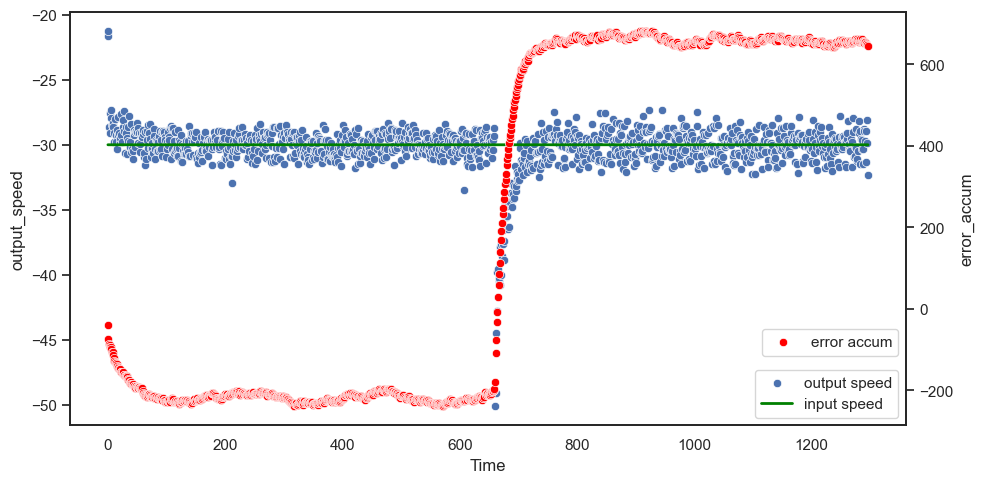

In [49]:
fig, ax = plt.subplots(figsize=(10,5))

ax2 = ax.twinx()
sns.scatterplot(data=speed, x= speed.index, y=speed.output_speed, ax=ax, label='output speed')
sns.scatterplot(data=speed, x=speed.index, y=speed.error_accum, ax=ax2, color='red', label='error accum')
sns.lineplot(data=speed, x=speed.index, y=speed['input speed'], ax=ax, color='green', linewidth=2, label='input speed')
legend1 = ax.legend(loc='lower right', bbox_to_anchor=(1, 0))
legend2 = ax2.legend(loc='lower right', bbox_to_anchor=(1, 0.15))
ax.set_xlabel('Time')
plt.savefig('unitree/data/driving_motor/error_accum.png')
plt.tight_layout()
plt.show()

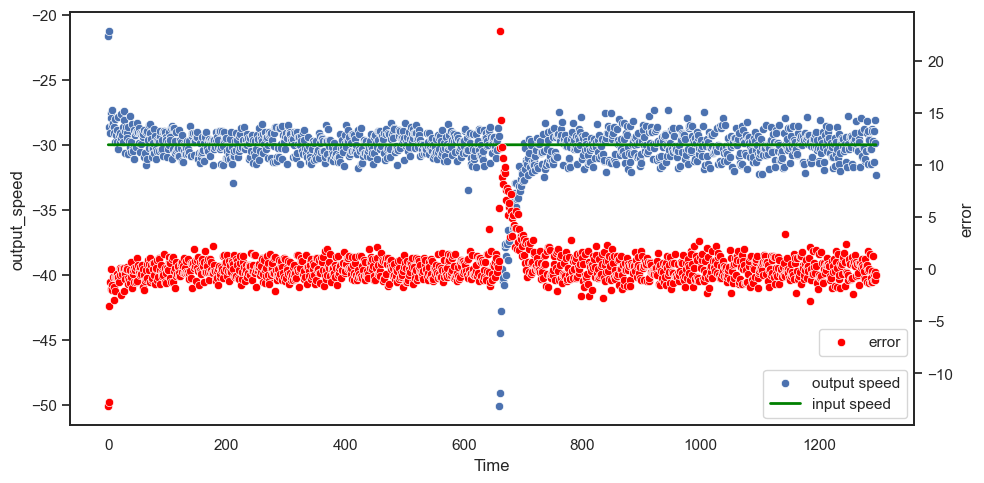

In [50]:
fig, ax = plt.subplots(figsize=(10,5))

ax2 = ax.twinx()
sns.scatterplot(data=speed, x= speed.index, y=speed.output_speed, ax=ax, label='output speed')
sns.scatterplot(data=speed, x=speed.index, y=speed.error, ax=ax2, color='red', label='error')
sns.lineplot(data=speed, x=speed.index, y=speed['input speed'], ax=ax, color='green', linewidth=2, label='input speed')
legend1 = ax.legend(loc='lower right', bbox_to_anchor=(1, 0))
legend2 = ax2.legend(loc='lower right', bbox_to_anchor=(1, 0.15))
ax.set_xlabel('Time')
plt.tight_layout()
plt.savefig('unitree/data/driving_motor/error.png')
plt.show()

In [4]:
motor_data = pd.read_csv('./unitree/data/go1_no_feedback_no_feedforward.csv', index_col=0)
tor_ff = pd.read_csv('./unitree/data/forward.csv')

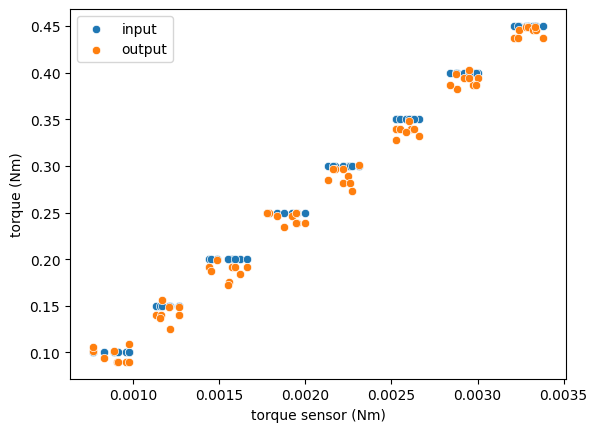

In [53]:
motor_data['torque_sensor'] = motor_data['voltage'].apply(lambda x: x  / 0.4509 * 22.6)
sns.scatterplot(data=motor_data, x='torque_sensor', y='input_torque')
sns.scatterplot(data=motor_data, x='torque_sensor', y='output_torque')
plt.ylabel('torque (Nm)')
plt.xlabel('torque sensor (Nm)')
plt.legend(['input', 'output'])
plt.show()

,input_speed,input_torque,voltage,output_speed,output_torque,temp
0,12.66,0.10,0.000017,11.48650,0.093750,27.0
1,12.66,0.10,0.000018,10.33290,0.085938,27.0
2,12.66,0.10,0.000020,9.54752,0.105469,27.0
3,12.66,0.15,0.000023,10.48020,0.136719,27.0
4,12.66,0.15,0.000024,10.40660,0.132812,28.0
...,...,...,...,...,...,...
67,25.32,0.40,0.000057,20.46950,0.378906,30.0
68,25.32,0.40,0.000058,20.78860,0.386719,30.0
69,25.32,0.45,0.000065,18.99690,0.437500,30.0
70,25.32,0.45,0.000065,20.86220,0.421875,30.0


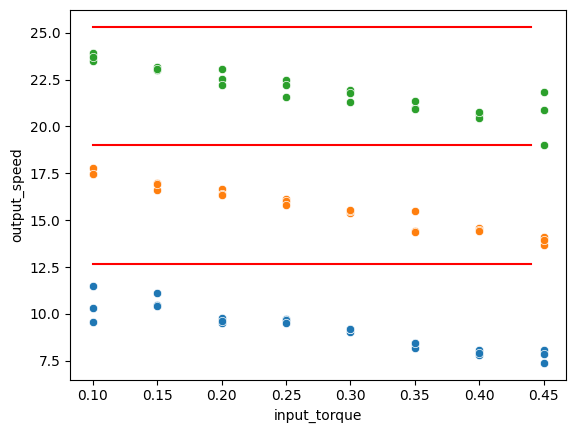

In [9]:
def plot_group(df):
    sns.scatterplot(data=df, x='input_torque', y='output_speed')
    x = np.arange(df['input_torque'].min(), df['input_torque'].max(), 0.01)
    y = df['input_speed'].iloc[0] * np.ones(len(x))
    sns.lineplot(x=x, y=y, color='red')
    return df

motor_data['output_speed'] = abs(motor_data['output_speed'])
motor_data.groupby('input_speed', as_index=False).apply(lambda x: plot_group(x))

,input_speed,input_torque,voltage,output_speed,output_torque,temp
0,12.66,0.10,0.000015,15.4135,0.093750,32.0
1,12.66,0.10,0.000018,10.8238,0.089844,32.0
2,12.66,0.10,0.000016,11.9283,0.101562,32.0
3,12.66,0.15,0.000022,12.1982,0.136719,32.0
4,12.66,0.15,0.000023,10.6765,0.136719,32.0
...,...,...,...,...,...,...
67,25.32,0.40,0.000057,19.4632,0.398438,32.0
68,25.32,0.40,0.000057,23.8565,0.414062,32.0
69,25.32,0.45,0.000064,25.1573,0.437500,32.0
70,25.32,0.45,0.000064,24.6174,0.445312,32.0


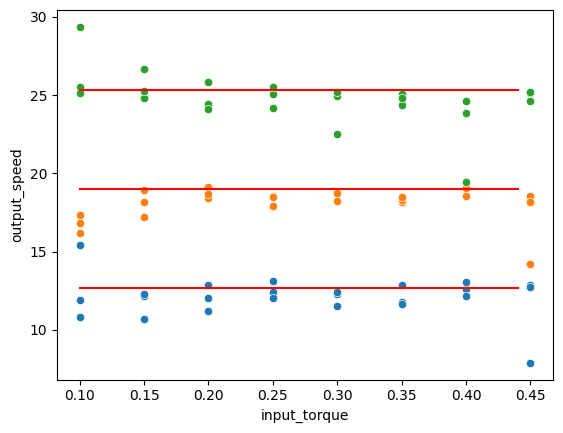

In [58]:
def plot_group(df):
    sns.scatterplot(data=df, x='input_torque', y='output_speed')
    x = np.arange(df['input_torque'].min(), df['input_torque'].max(), 0.01)
    y = df['input_speed'].iloc[0] * np.ones(len(x))
    sns.lineplot(x=x, y=y, color='red')
    return df

motor_data['output_speed'] = abs(motor_data['output_speed'])
motor_data.groupby('input_speed', as_index=False).apply(lambda x: plot_group(x))

,input_speed,input_torque,voltage,output_speed,output_torque,temp
0,12.66,0.10,0.000017,11.48650,0.093750,27.0
1,12.66,0.10,0.000018,10.33290,0.085938,27.0
2,12.66,0.10,0.000020,9.54752,0.105469,27.0
3,12.66,0.15,0.000023,10.48020,0.136719,27.0
4,12.66,0.15,0.000024,10.40660,0.132812,28.0
...,...,...,...,...,...,...
67,25.32,0.40,0.000057,20.46950,0.378906,30.0
68,25.32,0.40,0.000058,20.78860,0.386719,30.0
69,25.32,0.45,0.000065,18.99690,0.437500,30.0
70,25.32,0.45,0.000065,20.86220,0.421875,30.0


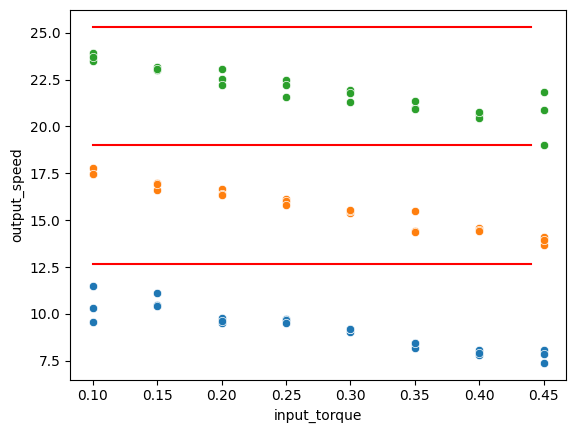

In [4]:
def plot_group(df):
    sns.scatterplot(data=df, x='input_torque', y='output_speed')
    x = np.arange(df['input_torque'].min(), df['input_torque'].max(), 0.01)
    y = df['input_speed'].iloc[0] * np.ones(len(x))
    sns.lineplot(x=x, y=y, color='red')
    return df

motor_data['output_speed'] = abs(motor_data['output_speed'])
motor_data.groupby('input_speed', as_index=False).apply(lambda x: plot_group(x))

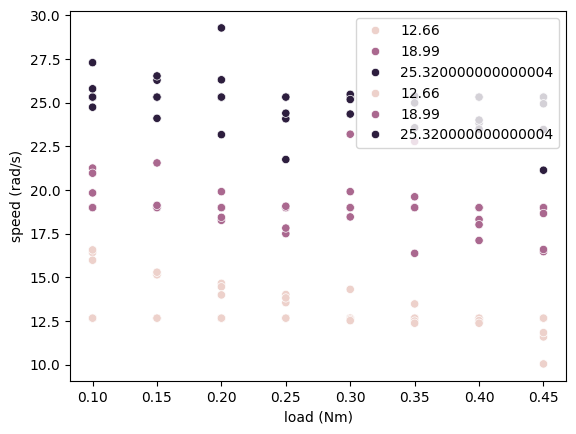

In [33]:
motor_data['output_speed'] = abs(motor_data['output_speed'])
sns.scatterplot(data=motor_data, x="input_torque", y='input_speed', hue='input_speed')
sns.scatterplot(data=motor_data, x="input_torque", y='output_speed', hue='input_speed')
plt.legend()
plt.ylabel('speed (rad/s)')
plt.xlabel('load (Nm)')
plt.show()

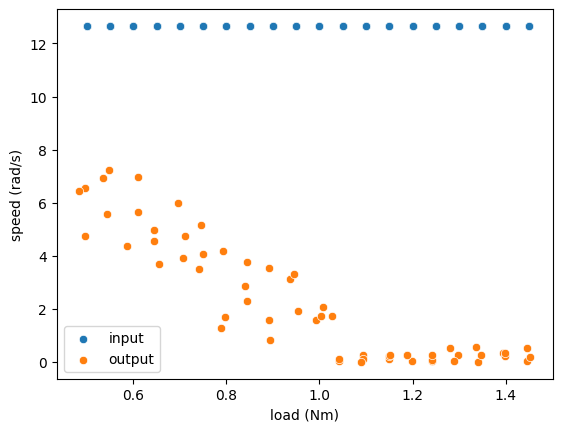

In [26]:
# motor_data['output_speed'] = abs(motor_data['output_speed'])
# sns.scatterplot(data=motor_data, x="input_torque", y='input_speed')
# sns.scatterplot(data=motor_data, x="output_torque", y='output_speed')
# plt.legend(labels=['input', 'output'])
# plt.ylabel('speed (rad/s)')
# plt.xlabel('load (Nm)')
# plt.show()

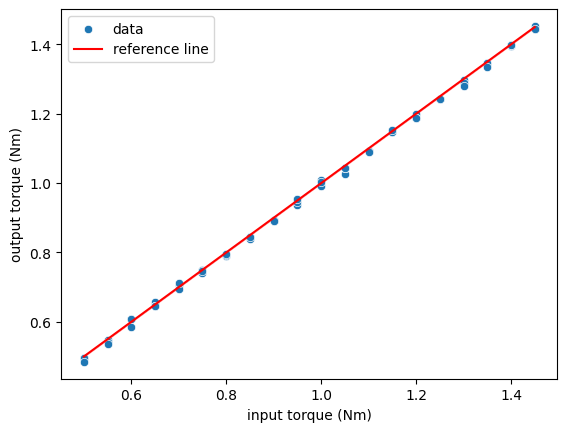

In [113]:
sns.scatterplot(data=motor_data, x="input_torque", y='output_torque')
sns.lineplot(data=motor_data, x='input_torque', y='input_torque', color='red')
plt.legend(['data', 'reference line'])
plt.ylabel('output torque (Nm)')
plt.xlabel('input torque (Nm)')
plt.show()

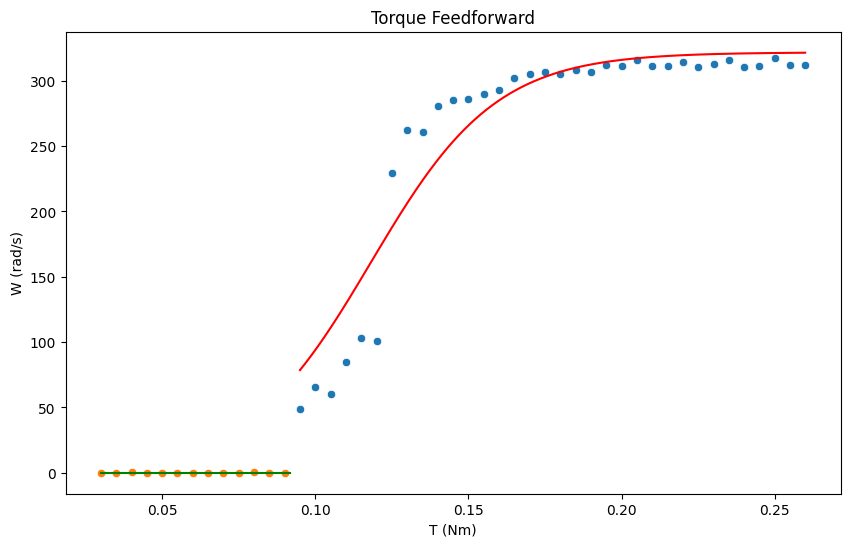

In [31]:
import math
Threshold = 0.092

under_fit = tor_ff [tor_ff['T'] > Threshold]

from scipy.optimize import curve_fit

def asymptotic_line(x, a, b):
    return 1/ (a + pow(math.e, b* x))

popt, pcov = curve_fit(asymptotic_line, under_fit['T'], under_fit['W'])
a, b = popt

x = np.arange(under_fit['T'].min(), under_fit['T'].max(), 0.0001)
y = asymptotic_line(x, a, b)

static_x = np.arange(tor_ff['T'].min(), Threshold, 0.0001)
# Get the coefficients of the fitted line

# Generate the fitted line

# sns.lineplot(x=x, y=fitting_line.reshape(-1), color='red')
plt.figure(figsize=(10, 6))  # Width: 8 inches, Height: 6 inches
sns.lineplot(x=x, y=y.reshape(-1), color='red')
sns.scatterplot(data=under_fit, x="T", y="W")
sns.lineplot(x=static_x, y=0, color='green')
sns.scatterplot(data=tor_ff[tor_ff['T'] <= Threshold], x="T", y="W")

plt.title('Torque Feedforward')
plt.ylabel('W (rad/s)')
plt.xlabel('T (Nm)')
plt.show()

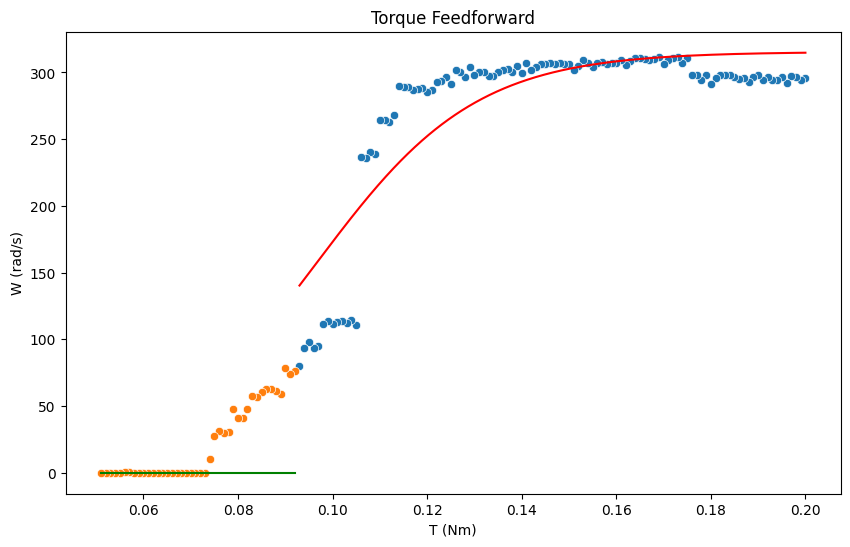

In [3]:
import math
Threshold = 0.092

under_fit = tor_ff [tor_ff['T'] > Threshold]

from scipy.optimize import curve_fit

def asymptotic_line(x, a, b):
    return 1/ (a + pow(math.e, b* x))

popt, pcov = curve_fit(asymptotic_line, under_fit['T'], under_fit['W'])
a, b = popt

x = np.arange(under_fit['T'].min(), under_fit['T'].max(), 0.0001)
y = asymptotic_line(x, a, b)

static_x = np.arange(tor_ff['T'].min(), Threshold, 0.0001)
# Get the coefficients of the fitted line

# Generate the fitted line

# sns.lineplot(x=x, y=fitting_line.reshape(-1), color='red')
plt.figure(figsize=(10, 6))  # Width: 8 inches, Height: 6 inches
sns.lineplot(x=x, y=y.reshape(-1), color='red')
sns.scatterplot(data=under_fit, x="T", y="W")
sns.lineplot(x=static_x, y=0, color='green')
sns.scatterplot(data=tor_ff[tor_ff['T'] <= Threshold], x="T", y="W")

plt.title('Torque Feedforward')
plt.ylabel('W (rad/s)')
plt.xlabel('T (Nm)')
plt.show()

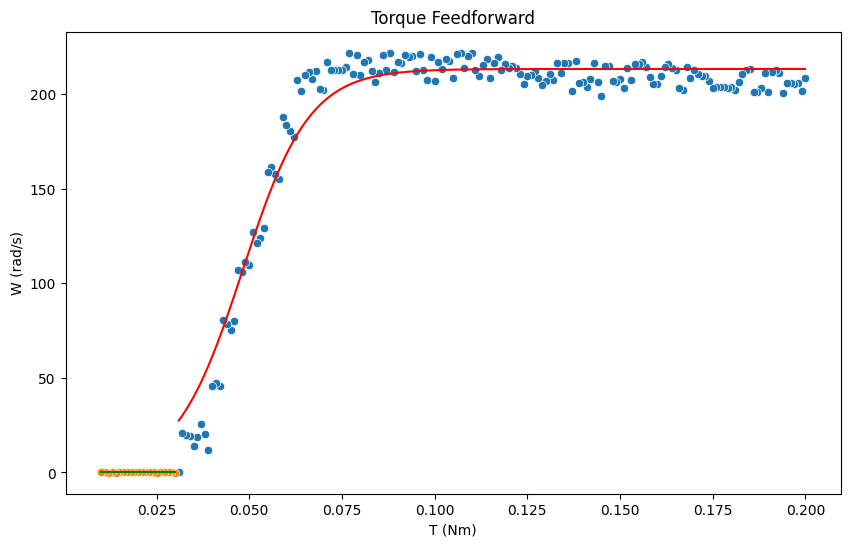

In [6]:
import math
Threshold = 0.03

under_fit = tor_ff [tor_ff['T'] > Threshold]

from scipy.optimize import curve_fit

def asymptotic_line(x, a, b):
    return 1/ (a + pow(math.e, b* x))

popt, pcov = curve_fit(asymptotic_line, under_fit['T'], under_fit['W'])
a, b = popt

x = np.arange(under_fit['T'].min(), under_fit['T'].max(), 0.0001)
y = asymptotic_line(x, a, b)

static_x = np.arange(tor_ff['T'].min(), Threshold, 0.0001)
# Get the coefficients of the fitted line

# Generate the fitted line

# sns.lineplot(x=x, y=fitting_line.reshape(-1), color='red')
plt.figure(figsize=(10, 6))  # Width: 8 inches, Height: 6 inches
sns.lineplot(x=x, y=y.reshape(-1), color='red')
sns.scatterplot(data=under_fit, x="T", y="W")
sns.lineplot(x=static_x, y=0, color='green')
sns.scatterplot(data=tor_ff[tor_ff['T'] <= Threshold], x="T", y="W")

plt.title('Torque Feedforward')
plt.ylabel('W (rad/s)')
plt.xlabel('T (Nm)')
plt.show()